In [1]:
# https:/onepagecode.substack.com
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

This code imports various libraries such as numpy, pandas, seaborn, and matplotlib. It also imports specific classes and functions from pandas and statsmodels. These libraries and functions are commonly used for data processing, data visualization, and time series analysis. The code does not include any specific actions or functions, it simply imports the necessary tools for further analysis.

In [2]:
# https:/onepagecode.substack.com
warnings.filterwarnings('ignore')

The code `warnings.filterwarnings('ignore')` is used to suppress warning messages that may be displayed during the execution of a program. By calling this function with the argument `'ignore'`, the program instructs Python to hide any warning messages that may arise. This can be useful in situations where the programmer knows that the warnings are not relevant or can be safely ignored.

In [3]:
# https:/onepagecode.substack.com


print(os.listdir("../input"))

print(check_output(["ls", "../input/Data"]).decode("utf8"))


['Stocks', 'ETFs', 'Data']
ETFs
Stocks



This code is written in Python and is used to list the files in the input directory of the current environment. It uses the `os.listdir()` function to retrieve a list of all the files in the specified directory and the `print()` function to display the list of file names. It also uses the `check_output()` function to run the command "ls" on the specified directory and the `decode()` function to convert the output to UTF-8 format before printing it. The code is primarily used for exploring and accessing the input data files in the current environment.

In [5]:
# https:/onepagecode.substack.com
df = pd.read_csv("../input/Data/Stocks/tsla.us.txt")
df.head()

Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0

This code reads a CSV file containing stock data for Tesla and stores it in a DataFrame called 'df'. The DataFrame is then displayed using the 'head()' function, which shows the first few rows of the DataFrame.

In [6]:
# https:/onepagecode.substack.com
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


The given code uses the Pandas library to manipulate a dataframe called "df". The first line prints the first five rows of the dataframe. The second line prints the number of rows and columns in the dataframe. The third line prints the column labels of the dataframe. These lines of code are used for data exploration and analysis, allowing the user to get a glimpse of the data and understand its structure.

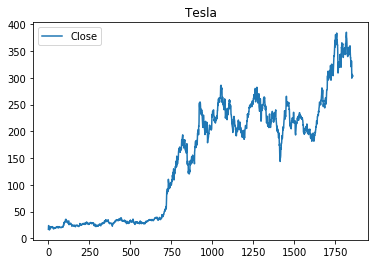

In [7]:
# https:/onepagecode.substack.com
df[['Close']].plot()
plt.title("Tesla")
plt.show()

The code takes a DataFrame, selects a specific column called "Close", and plots the data as a line chart. It then sets the title of the chart as "Tesla" and displays the chart. Essentially, the code visualizes the closing prices of Tesla stock over a period of time. This can be useful for analyzing trends and patterns in the stock's performance.

Text(0.5, 1.0, 'Tesla Cumulative Returns')

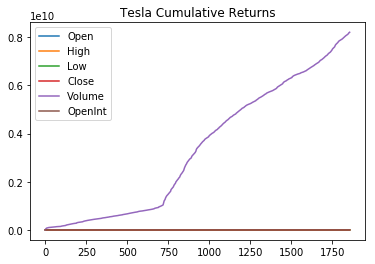

In [8]:
# https:/onepagecode.substack.com
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

The code calculates the cumulative return of a given dataset and plots it on a graph. The variable "dr" represents the cumulative sum of the dataset, and the function "plot" is used to visualize the cumulative returns. The graph is then labeled as "Tesla Cumulative Returns" using the "title" function from the "plt" module. Overall, the code aims to provide an overview of how the returns of the dataset have accumulated over time for Tesla.

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

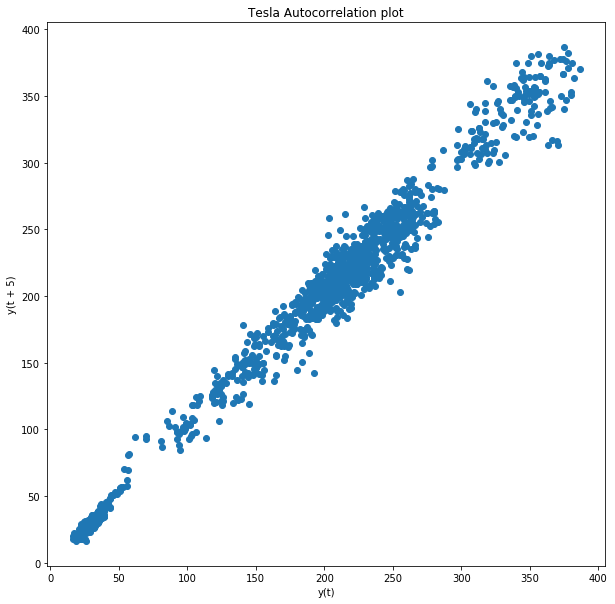

In [9]:
# https:/onepagecode.substack.com
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

This code generates and displays an autocorrelation plot using the lag_plot function from the matplotlib library. The plot is based on the 'Open' column of the dataframe 'df' and has a lag of 5. The autocorrelation plot allows visual analysis of the correlation between each data point and its lagged values. The resulting plot helps identify patterns and dependencies in the time series data. The code includes a title for the plot, which in this case is 'Tesla Autocorrelation plot'. The figsize parameter specifies the size of the plot.

In [10]:
# https:/onepagecode.substack.com
df['Date'][1857]

'2017-11-10'

This code retrieves the value at index 1857 from the 'Date' column of the dataframe 'df'. In simpler terms, it fetches the specific date stored in the 1857th row of the 'Date' column of the dataframe.

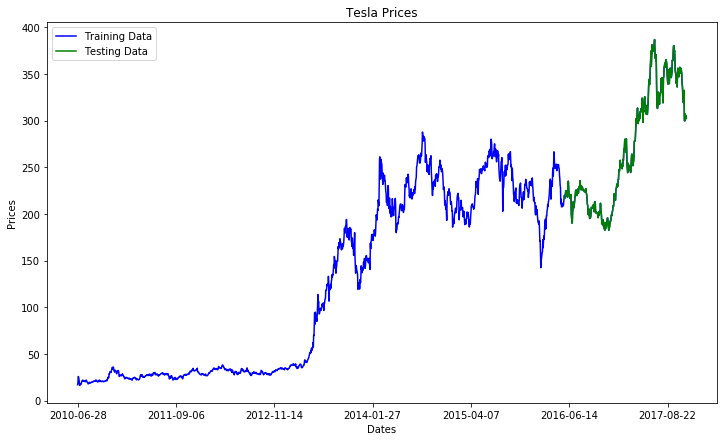

In [11]:
# https:/onepagecode.substack.com
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

This code splits a dataframe `df` into training and testing data based on a specified ratio. It then creates a line chart using the `plot` function from the `matplotlib.pyplot` library. The x-axis represents dates and the y-axis represents prices. The blue line represents the training data, while the green line represents the testing data. The x-axis tick marks are set to display dates at regular intervals, and a legend is added to differentiate between the two lines.

In [12]:
# https:/onepagecode.substack.com
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

The function "smape_kun" calculates the Symmetric Mean Absolute Percentage Error (SMAPE) between two arrays, y_true and y_pred. It does this by first calculating the absolute difference between the predicted values (y_pred) and the true values (y_true). Then, it multiplies this absolute difference by a constant factor of 200 divided by the sum of the absolute values of y_pred and y_true. Finally, it takes the mean of these values and returns the result. The SMAPE is a measure of the average percentage difference between the true and predicted values, and this function allows for quantifying the accuracy of a model's predictions.

In [13]:
# https:/onepagecode.substack.com
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 40.550
Symmetric mean absolute percentage error: 26.015


This code takes the 'Open' values from a training data set and a test data set. It then trains an ARIMA (AutoRegressive Integrated Moving Average) model on the training data. The model is used to make predictions on the test data. The predicted values are stored in a list called 'predictions'. The code also calculates the mean squared error and the symmetric mean absolute percentage error between the predicted values and the actual values in the test data. The results are printed to the console.

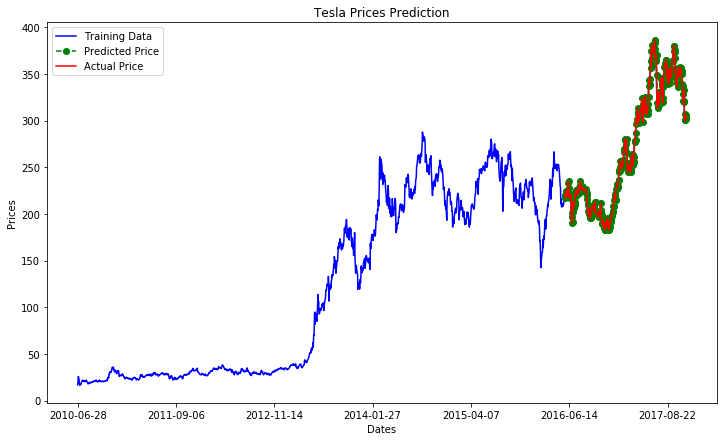

In [14]:
# https:/onepagecode.substack.com
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

This code creates a plot using the matplotlib library. The plot depicts the 'Open' values from a DataFrame called 'df' as a green line labeled 'Training Data'. It also plots the predicted price values as green dots connected by dashed lines, labeled 'Predicted Price'. Additionally, it plots the actual 'Open' price values as a red line labeled 'Actual Price'. The plot is then given a title, x-axis and y-axis labels, and custom tick positions on the x-axis using dates from the 'Date' column of the DataFrame. Lastly, a legend is added to indicate which line represents each set of data.

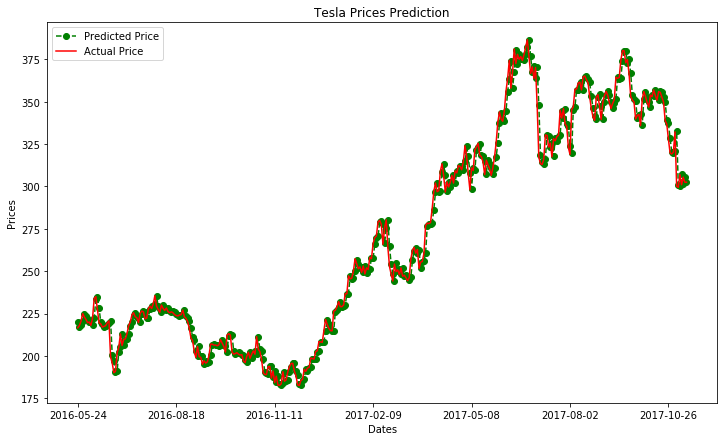

In [16]:
# https:/onepagecode.substack.com
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

The given code generates a figure with a plot that compares predicted and actual prices of Tesla stock. The x-axis represents the dates, and the y-axis represents the prices. The predicted prices are displayed as green dots connected by dashed lines, and the actual prices are displayed as a continuous red line. The x-axis tick marks are set at specific intervals using the dates from the dataset. The title of the plot is "Tesla Prices Prediction", and the x-axis label is "Dates" while the y-axis label is "Prices". The legend is also displayed to differentiate between predicted and actual prices.

In [17]:
# https:/onepagecode.substack.com
df = pd.read_csv("../input/Data/Stocks/msft.us.txt").fillna(0)
df.head()

Date     Open     High      Low    Close      Volume  OpenInt
0  1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506        0
1  1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463        0
2  1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245        0
3  1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008        0
4  1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515        0

The code reads a CSV file containing stock data for Microsoft (MSFT) from a specified location. It uses the pandas library to create a DataFrame object with the CSV data, and any missing values in the data are filled with zeros. The DataFrame is then displayed using the head() method, which shows the first few rows of the data. Overall, this code fetches the Microsoft stock data from a file and displays a preview of it.

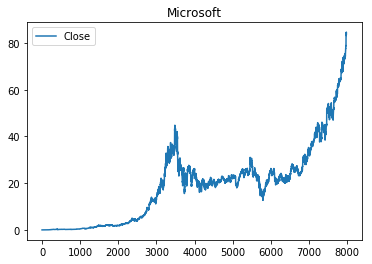

In [18]:
# https:/onepagecode.substack.com
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

This code generates a line plot of the 'Close' data from a dataframe called 'df'. The plot is then given a title of "Microsoft" and displayed without any further customization. The resulting visualization allows the user to observe the trends and patterns in the closing prices specifically for the Microsoft stock.

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

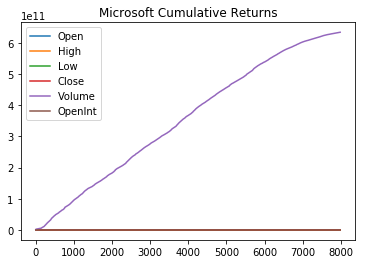

In [19]:
# https:/onepagecode.substack.com
dr = df.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

This code generates a plot of the cumulative returns of Microsoft stock. It first calculates the cumulative sum of the daily returns using the `cumsum()` function and assigns it to the variable `dr`. Then, it uses the `plot()` function to create a line plot of the cumulative returns. Finally, it sets the title of the plot to "Microsoft Cumulative Returns" using the `title()` function from the `plt` module. The resulting plot provides a visual representation of the overall performance of Microsoft stock over time.

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

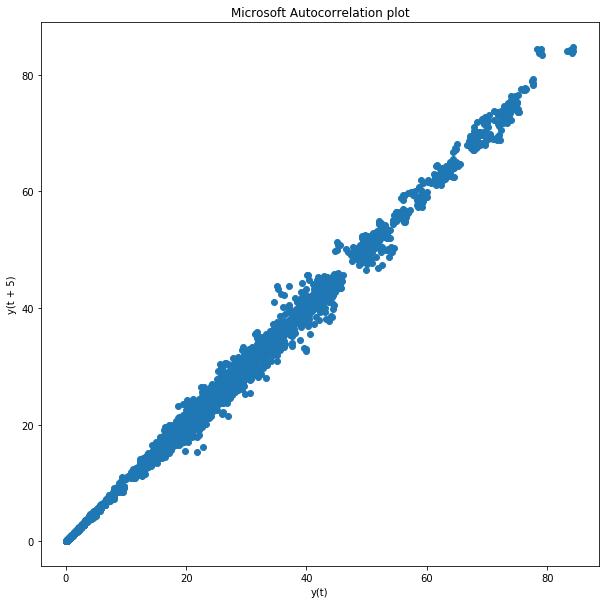

In [20]:
# https:/onepagecode.substack.com
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

This code generates and displays an autocorrelation plot for the 'Open' column of a DataFrame called 'df'. The plot is created using the matplotlib library, and the figure size is set to 10x10. The lag parameter is set to 5, indicating that the autocorrelation plot will show the correlation between the 'Open' values at time t and the 'Open' values at time t-5. The title of the plot is set to 'Microsoft Autocorrelation plot'. An autocorrelation plot helps visualize the correlation between a variable and its delayed versions, providing insights into potential patterns or relationships in the data.

In [21]:
# https:/onepagecode.substack.com
df['Date'][7982]

'2017-11-10'

This code retrieves the value at index 7982 from the 'Date' column of the DataFrame df. The 'Date' column is likely a column containing date or timestamp information. By accessing the value at a specific index, this code allows the user to retrieve a particular date from the 'Date' column in the DataFrame.

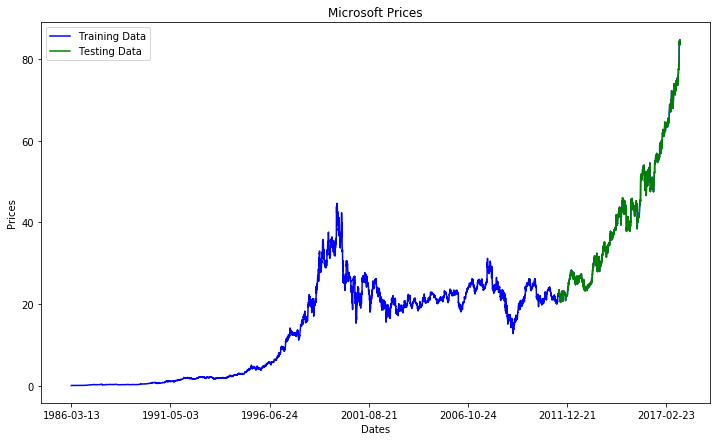

In [22]:
# https:/onepagecode.substack.com
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

This code takes a DataFrame named "df" and splits it into two parts: "train_data" and "test_data". The train_data contains 80% of the original data, starting from the beginning, while the test_data contains the remaining 20% of the data, starting from the end.  After that, the code uses the Matplotlib library to create a figure with a size of 12x7. It sets the title of the plot to "Microsoft Prices" and labels the x-axis as "Dates" and the y-axis as "Prices".   The code then plots the 'Open' column from the entire DataFrame as a blue line and labels it as "Training Data". It also plots the 'Open' column from the 'test_data' portion of the DataFrame as a green line and labels it as "Testing Data".   The x-tick labels are adjusted to show every 1300th entry from the 'Date' column of the DataFrame. Finally, a legend is added to differentiate between the training and testing data.

In [23]:
# https:/onepagecode.substack.com
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

The code calculates the symmetric mean absolute percentage error (SMAPE) between two arrays, y_true and y_pred. It first calculates the absolute difference between each corresponding element in y_true and y_pred. Then, it multiplies this absolute difference by 200 and divides it by the sum of the absolute values of y_pred and y_true. Finally, it takes the mean of all these values and returns it. SMAPE is a measure of the relative difference between the true and predicted values. In short, the code calculates the average SMAPE between the true and predicted arrays.

In [24]:
# https:/onepagecode.substack.com
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.343
Symmetric mean absolute percentage error: 40.776


This code performs time series forecasting using the ARIMA (Autoregressive Integrated Moving Average) model on a dataset of stock market opening prices. It first extracts the 'Open' column values from the train_data and test_data datasets. Then, it initializes a history list with the train_ar values. The code then iterates over each value in the test_ar and fits an ARIMA model with order (5,1,0) using the history values. It then forecasts the next value (yhat) using the model_fit. The predicted value is appended to the predictions list and the observed value is added to the history list. Finally, the code calculates the mean squared error and the symmetric mean absolute percentage error between the test_ar values and the predictions.

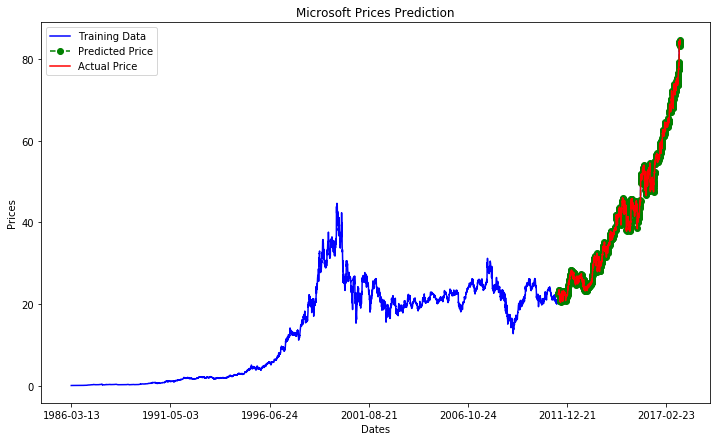

In [25]:
# https:/onepagecode.substack.com
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

This code creates a line plot with three lines representing different datasets. The "Training Data" line is plotted in blue and represents the 'Open' values from a dataframe called 'df'. The "Predicted Price" line is plotted in green with dashed lines and represents the predicted prices at specific dates. The "Actual Price" line is plotted in red and represents the actual prices at those dates. The plot is given a title, labels for the x and y axes, and custom tick marks on the x-axis representing specific dates from the 'Date' column in 'df'. Finally, a legend is added to indicate which line corresponds to which dataset.

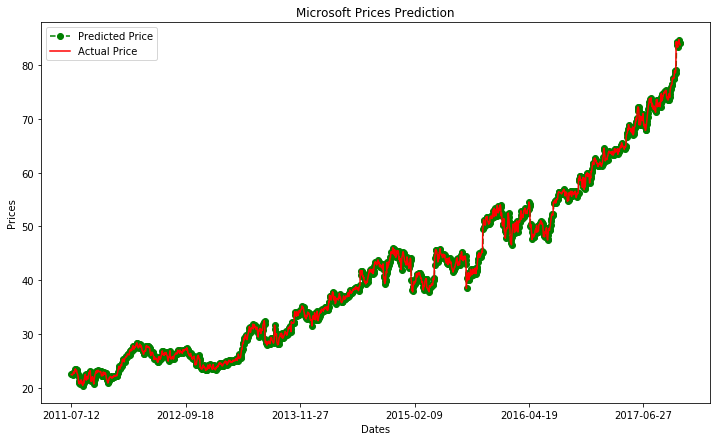

In [27]:
# https:/onepagecode.substack.com
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()

This code generates a line plot to compare predicted and actual prices of Microsoft stock. The plot includes markers and a dashed line for the predicted prices, and a solid line for the actual prices. The plot is titled "Microsoft Prices Prediction" and the x-axis represents dates while the y-axis represents prices. The x-axis also includes ticks at specific dates from the given data range. Additionally, a legend is included to differentiate between the predicted and actual prices. The figure size of the plot is set to 12 inches by 7 inches.